## La relevancia del Deep Learning para pocos datos

A veces escuchamos que el deep learning solo funciona cuando hay disponibles muchos datos. Esto es cierto en parte: una caracteristica fundamental del **deep learning** es que puede encontrar caracteristicas interesantes en los datos de entrenamiento por si mismo, sin que necesite ninguna ingenieria de caracteristicas manual, pero eso solo puede conseguirse cuando hay muchos datos de entrenamiento. Esto en en general es cierto cuando las muestras de entrada tienen muchas dimensiones, como las imagenes.

Pero lo que constituye muchas muestras es relativo, relativo segun la profundidad de la red o el tamaño. Por ejemplo no es posible entrenar una convnet para resolver un problema complejo con solo unas decenas de muestras, pero algunos cientos pueden ser suficientes si el modelo esta regularizado y si la tarea es sencilla.

Puesto que las convnets aprenden caracteristicas locales con invariancia traslacional, tiene una gran eficiencia de datos en problemas perceptuales. Entrenar una convnet desde 0 en un conjunto de imagenes muy pequeño seguira generando resultados razonables pese a la relativa falta de datos, sin necesidad de que se utilice una ingenieria de caracteristicas.

Ademas los modelos de deep learning tienen por naturaleza una gran capacidad para cambiar de finalidad: podriamos tomar un modelo de clasificacion de imagenes entrenado con un conjunto de datos a gran escala y reutilizarlo en problemas diferentes con solo algunos cambios menores.
Esto es lo que vamos a hacer en este cuaderno.
Primero empezaremos con la descarga de los datos 

In [1]:
import keras
import os, shutil

### Descargar los datos

El conjunto de datos Dogs vs. Cats no se incluye en keras. Kaggle lo puso a disposicion en 2013, cuando las convnets no eran populares.

Puede descargarlo aqui: https://www.kaggle.com/c/dogs-vs-cats/data

Las imagenes son en color , de resolucion media y formato JPEG.

Como era de esperar la competicion de 2013 la ganaron participantes que usaron convnets. Obtuvieron una exactitud del 95%. 
La idea de este notebook va ser acercarnos a esa valor pero usando solo el 10% de los datos que estan disponibles.

El conjunto de datos contiene 25.000 imagenes de perros y gatos (12.500 de cada clase)
Luego de descargarlo y descomprimirlo vamos a crear un nuevo conjunto de datos con 3 subconjuntos: un conjunto de entrenamiento con 1000 muestras de cada clase, un conjunto de validacion con 500 muestras de cada clase y un conjunto de prueba con 500 muestras de cada clase.

#### 1.1 Copiar imagenes en directorios de entrenamiento, validacion y prueba

In [2]:
cd

C:\Users\joaqu


In [16]:
# Ruta a directorio donde descomprimi el dataset original
original_dataset_dir1='C:/Users/joaqu/Downloads/dogs-vs-cats/train'


In [6]:
#directorio donde guardo el dataset mas chico
base_dir='C:/Users/joaqu/Downloads/dogs-vs-cats-small'
os.makedirs(base_dir) #creo directorio

In [7]:
#Creo directorios con carpeta train , validation y test
train_dir= os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir= os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir= os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [8]:
#creo carptetas dentro de cada directorio para luego guardar imagenes de gatos
train_cat_dir=os.path.join(train_dir,'cats')
os.makedirs(train_cat_dir)

validation_cat_dir=os.path.join(validation_dir,'cats')
os.makedirs(validation_cat_dir)

test_cat_dir=os.path.join(test_dir,'cats')
os.makedirs(test_cat_dir)




In [9]:
#creo carptetas dentro de cada directorio para luego guardar imagenes de perros
train_dog_dir=os.path.join(train_dir,'dogs')
os.makedirs(train_dog_dir)

validation_dog_dir=os.path.join(validation_dir,'dogs')
os.makedirs(validation_dog_dir)

test_dog_dir=os.path.join(test_dir,'dogs')
os.makedirs(test_dog_dir)

Viendo el dataset observo que las imagenes empiezan con el nombre de la clase luego un '.' , el numero y el formato. Por ejemplo
la primer imagen de gatos es cat.0.jpg. 
Por eso a continuacion creo una lista con los nombres de las primeras 1000 imagenes de gatos.

In [10]:
fnames= ['cat.{}.jpg'.format(i) for i in range(1000)]  

#### Mover las imagenes de entrenamiento de cats de la carpeta original_dataset_dir1 a la carpeta train_cat_dir

Recorro la lista de nombres de imagenes  fnames y en cada iteracion creo la variable src y le asigno la union de la ruta original y el nombre de la imagen actual.
A la variable dst le asigno la union de la ruta train_cat_dir y el nombre de la imagen actual.
Luego copio la imagen de src al directorio creado.


In [13]:
for fname in fnames:
    src=os.path.join(original_dataset_dir1,fname)
    dst=os.path.join(train_cat_dir,fname)
    shutil.copyfile(src,dst)

#### Mover las imagenes de validacion de cats de la carpeta original_dataset_dir1 a la carpeta validation_cat_dir

Recorro la lista de nombres de imagenes  fnames desde la posicion 1000 a 1499 y en cada iteracion creo la variable src y le asigno la union de la ruta original y el nombre de la imagen actual.
A la variable dst le asigno la union de la ruta train_cat_dir y el nombre de la imagen actual.
Luego copio la imagen de src al directorio creado.



In [14]:
fnames= ['cat.{}.jpg'.format(i) for i in range(1000,1500)] 
for fname in fnames:
    src=os.path.join(original_dataset_dir1,fname)
    dst=os.path.join(validation_cat_dir,fname)
    shutil.copyfile(src,dst)

#### Mover las imagenes de test de cats de la carpeta original_dataset_dir2 a la carpeta test_cat_dir

Recorro la lista de nombres de imagenes  fnames desde la posicion 0 a 500 y en cada iteracion creo la variable src y le asigno la union de la ruta original y el nombre de la imagen actual.
A la variable dst le asigno la union de la ruta train_cat_dir y el nombre de la imagen actual.
Luego copio la imagen de src al directorio creado.


In [17]:
fnames= ['cat.{}.jpg'.format(i) for i in range(1500,2000)] 
for fname in fnames:
    src=os.path.join(original_dataset_dir1,fname)
    dst=os.path.join(test_cat_dir,fname)
    shutil.copyfile(src,dst)

Hacemos lo mismo con las imagenes de perros

In [19]:
fnames= ['dog.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames:
    src=os.path.join(original_dataset_dir1,fname)
    dst=os.path.join(train_dog_dir,fname)
    shutil.copyfile(src,dst)

In [ ]:
fnames= ['dog.{}.jpg'.format(i) for i in range(1000,1500)] 
for fname in fnames:
    src=os.path.join(original_dataset_dir1,fname)
    dst=os.path.join(validation_dog_dir,fname)
    shutil.copyfile(src,dst)

In [21]:
fnames= ['dog.{}.jpg'.format(i) for i in range(1500,2000)] 
for fname in fnames:
    src=os.path.join(original_dataset_dir1,fname)
    dst=os.path.join(test_dog_dir,fname)
    shutil.copyfile(src,dst)

In [22]:
#comprobamos la cantidad de imagenes en cada directorio

print('total training cat images:',len(os.listdir(train_cat_dir)))
print('total training dog images:',len(os.listdir(train_dog_dir)))
print('total validation cat images:',len(os.listdir(validation_cat_dir)))
print('total validation dog images:',len(os.listdir(validation_dog_dir)))
print('total test cat images:',len(os.listdir(test_cat_dir)))
print('total test dog images:',len(os.listdir(test_dog_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


Tenemos 2000 imagenes de entrenamiento, 1000 de validacion y 1000 de prueba. Cada division contiene el mismo numero de muestras de cada clase: se trata de un problema de clasificacion binaria equilibrada, lo que significa que la exactitud de la clasificacion sera una medida de la clasificacion adecuada!!!!!

#### CREAR LA RED
Empezamos con entra de tamano 150x150 (decision arbitraria) y acabamos con mapas de caracteristicas de tamano 7x7 junto antes de la capa flatten
Puesto que nos estamos enfrentando a un problema de clasificacion binaria, vamos a acabar la red con una sola unidad (una capa Dense de tamano 1) y una activacion sigmoid. Estaa unidad codificara la probabilidad de que la red este mirando una clase o la otra.


### Crear instancias en una convnet pequeña para clasificar perros y gatos

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [35]:
keras.__version__

'2.6.0'

In [48]:
model=keras.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Veamos un resumen del modelo

In [50]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)            

Como optimizador usamos RMSPROP y como la ultima capa de la red tiene una sola unidad usamos como funcion de perdida la entropia cruzada binaria.

In [51]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

#### PROCESAMIENTO DE LOS DATOS

Los datos deben formatearse para convertirlos en tensores de punto flotante antes de introducirlos al modelo.
En este momento, los datos se encuentran en una unidad como archivos JPEG, asi deberiamos aplicar los siguientes pasos:
- Leer los archivos de las imagenes.
- Descodificar el contenido JPEG a valores de pixeles RGB.
- Convertir estas en tensores de punto flotante.
- Cambiar la escala de los valores de pixeles (0 a 255) al intervalo [1,0]

Por suerte Keras cuanto con un modulo con asistentes para el procesamiento de imagenes, ubicados en *keras.preprocessing.image*
Este modulo contiene la clase *ImageDataGenerator* que nos permite configurar generadores de python que pueden convertir de forma automatica archivos de imagenes de un disco en lotes de tensores preprocesados.

A continuacion creo 2 instancias de la clase ImageDataGenerator pasandole como argumento que redimensione la imagen al intervalo [0,1]


In [54]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

Creo 2 generadores y les paso el directorio respectivo, el tamano de la imagen, el tamaño del lote y el modo binary ya que hay solo 2 clases.

In [55]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Veamos la salida de uno de estos generadores: produce lotes de imagenes RGB de 150x150 con la forma (20,150,150,3) y etiquetas binarias con la forma (20,)
Esto quiere decir que el metodo flow_from_directory retorna una tupla (x,y) donde x es la forma del lote de imagenes e y es la forma de las etiquetas
Hay 20 muestras en cada lote. Tenga en cuenta que el generador produce estos lotes de manera indefinida. Por eso necesitamos romper el bucle de iteracion en algun punto

In [56]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('label batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
label batch shape: (20,)


Vamos a entrenar el modelo usando el generator . Para ello usamos el metodo *fit_generator*, el cual espera como primer argumento un generador de Python que producira lotes de entradas y objetivos de manera indefinida. Puesto que los datos se estan generando infinitamente, el modelo de Keras necesita saber cuantas muestras sacar del generador antes de declarar que la repeticion (epoch) ha finalizado.
Esta es la mision del argumento *steps_per_epoch*: despues de haber sacado lotes steps_per_epoch del generador, el proceso de entrenamiento pasara a la siguiente repeticion. En este caso los lotes son de 20 muestras, asi que se necesitaran 100 lotes hasta que veamos nuestro objetivo de 2000 muestras.

Cuando utilizamos fit_generator podemos pasar un argumento *validation_data*, igual que con el metodo fit. Es importante tener en cuenta que se permite que este argumento sea un generador de datos, pero tambien podria ser una tupla de matrices Numpy. Si pasamos un generador como validation_data entonces se espera que este generador produzca lotes de datos de validacion indefinidamente, por eso deberiamos especificar tambien el argumento *validation_steps*, que indica al proceso cuantos lotes sacar del generador de validacion para la evaluacion.

In [58]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

C:\Users\joaqu\anaconda3\envs\ambienteML\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 81s 800ms/step - loss: 0.7031 - acc: 0.5470 - val_loss: 0.6846 - val_acc: 0.5420
Epoch 2/30
100/100 [==============================] - 69s 685ms/step - loss: 0.6232 - acc: 0.6560 - val_loss: 0.6164 - val_acc: 0.6520
Epoch 3/30
100/100 [==============================] - 68s 683ms/step - loss: 0.5568 - acc: 0.7235 - val_loss: 0.5969 - val_acc: 0.6950
Epoch 4/30
100/100 [==============================] - 59s 594ms/step - loss: 0.5109 - acc: 0.7555 - val_loss: 0.5925 - val_acc: 0.6970
Epoch 5/30
100/100 [==============================] - 58s 583ms/step - loss: 0.4615 - acc: 0.7915 - val_loss: 0.6396 - val_acc: 0.6750
Epoch 6/30
100/100 [==============================] - 62s 618ms/step - loss: 0.4178 - acc: 0.8120 - val_loss: 0.5883 - val_acc: 0.7070
Epoch 7/30
100/100 [==============================] - 61s 607ms/step - loss: 0.3807 - acc: 0.8360 - val_loss: 0.5872 - val_acc: 0.7020
Epoch 8/30
100/100 [==============================] - 5

Puede guardar un modelo creado con la API funcional en un solo archivo. Posteriormente, puede volver a crear el mismo modelo a partir de este archivo, incluso si ya no tiene acceso al codigo que creo el modelo.

Este archivo incluye:

- Los modelos de arquitectura
- Los valores de peso del modelo (que se aprendieron durante el entrenamiento)
- La configuración de entrenamiento del modelo (lo que pasó a 'compilar'), si corresponde
- El optimizador y su estado, si corresponde (esto le permite reiniciar el entrenamiento donde lo dejó)
 

In [60]:
# Guardar el Modelo
model.save('InitialModel.h5')

Dibujemos la perdida (loss) y la exactitud (accuracy) del modelo sobre los datos de entrenamiento y validacion durante el entrenamiento.

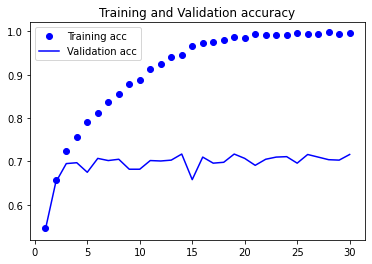

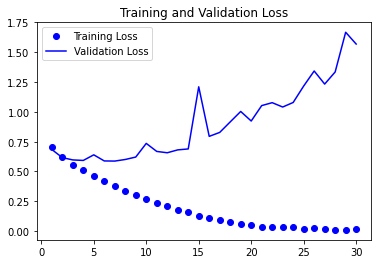

<Figure size 432x288 with 0 Axes>

In [63]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

plt.show()